In [2]:
import math
import numpy as np
# 已知条件
H = 200
D = 180
e = 40
K = 1.035
conefficient_l_AC2 = 0.38
Q1 = 140
Q2 = 115
Q3 = 190
conefficient_Rho_square = 0.17
n1 = 650
Delta = 1 / 100

pi = np.array([
    0, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.5, -5, -8, -15, -43.5, -140, -140, -72.5,
    -50.5, -32.5, -15, -7.5, -2.5, -2.5, -1, -1, -1, -1, -1, -1
])
u_pi = 2
pi = u_pi * pi
g = 10

In [3]:
#求解曲柄长度


class Mechanism:
    """曲柄滑块机构的求解计算"""

    def __init__(self, K, H, e):
        self.K = K
        self.H = H
        self.e = e
        self.theta = 180 * (K - 1) / (K + 1)
        self.l = 0
        self.r = 0

    def cal_theta(self):
        return self.theta

    def solve(self):
        """return l and r"""
        # 三角形圆的半径
        theta = self.theta / 180 * math.pi
        H = self.H
        e = self.e
        R = H / (2 * math.sin(theta))

        CD = R * math.cos(theta)
        OE = math.sqrt(R**2 - (CD - e)**2)
        OF = OE + H / 2

        l_plus_r = math.sqrt(OF**2 + e**2)
        alpha = math.asin(OE / R)
        delta = alpha - theta
        l_minus_r = 2 * R * math.sin(delta / 2)

        self.l = (l_plus_r + l_minus_r) / 2
        self.r = (l_plus_r - l_minus_r) / 2

        return (self.l, self.r)


crank_slider = Mechanism(K, H, e)

crank_slider.solve()

display("theta = {}".format(crank_slider.theta))
display("l = {}".format(crank_slider.l))
display("r = {}".format(crank_slider.r))


'theta = 3.0958230958230883'

'l = 397.52175616699924'

'r = 99.45807704268577'

In [4]:
# 以 O 点建立坐标系
from shapely import geometry as geo

import numpy as np

name_list = [
    'A0', 'A1', 'A2', "A2'", 'A3', 'A4', 'A5', 'A6', "A6'", 'A7', 'A8', 'A9',
    "A9'", 'A10', 'A11'
]


class Coordinates:

    def __init__(self, crank_slider):
        self.l = crank_slider.l
        self.r = crank_slider.r
        l_O_B_up = self.l + self.r
        l_O_B_down = self.l - self.r
        self.B_up = geo.Point(e, math.sqrt(l_O_B_up**2 - e**2))
        self.B_down = geo.Point(e, math.sqrt(l_O_B_down**2 - e**2))
        self.O = geo.Point(0, 0)
        self.theta_list = np.array([])
        self.A_list = []
        self.B_list = []

    def __cal_A0_theta(self):
        return math.atan(self.B_up.y / self.B_down.x)

    def __cal_A6_prime_theta(self):
        return math.atan(self.B_down.y / self.B_down.x) - math.pi

    def __cal_A2_prime_and_A9_prime_theta(self):
        """return (A2', A9')"""
        l_O_B_prime = math.sqrt(self.r**2 + self.l**2)
        B_prime = geo.Point(e, math.sqrt(l_O_B_prime**2 - e**2))
        theta_B_prime = math.atan(B_prime.y / B_prime.x)
        theta_B_0_A = math.atan(self.l / self.r)
        return (theta_B_prime - theta_B_0_A,
                theta_B_prime + theta_B_0_A - 2 * math.pi)

    def __cal_theta_list(self):
        delta_theta = 30 / 180 * math.pi
        temp_theta_list = []
        A0 = self.__cal_A0_theta()
        for i in range(0, 12):
            temp_theta = A0 - i * delta_theta
            temp_theta_list.append(temp_theta)
        (A2_prime, A9_prime) = self.__cal_A2_prime_and_A9_prime_theta()
        A6_prime = self.__cal_A6_prime_theta()
        temp_theta_list.extend([A2_prime, A6_prime, A9_prime])
        temp_theta_list.sort(reverse=True)
        self.theta_list = np.array(temp_theta_list, copy=True)

    def __cal_B_list(self):
        for theta_A in self.theta_list:
            A = geo.Point(self.r * math.cos(theta_A),
                          self.r * math.sin(theta_A))
            B_x = e
            B_y = A.y + math.sqrt(self.l**2 - (B_x - A.x)**2)
            B = geo.Point(B_x, B_y)
            self.A_list.append(A)
            self.B_list.append(B)

    def solve(self):
        self.__cal_theta_list()
        self.__cal_B_list()

    def draw(self):
        pass


def show_state(list_state):
    for (state_cur, name) in zip(list_state, name_list):
        display("{0} : {1}".format(name, state_cur))


def show_state_xy(list_state):
    for (state_cur, name) in zip(list_state, name_list):
        display("{0} : ({1}, {2})".format(name, state_cur.x, state_cur.y))


coor = Coordinates(crank_slider)
coor.solve()

display("B_up = ({0}, {1})".format(coor.B_up.x, coor.B_up.y))
display("B_down = ({0}, {1})".format(coor.B_down.x, coor.B_down.y))

angle_list = coor.theta_list / math.pi * 180

show_state(coor.theta_list)

show_state(angle_list)
show_state_xy(coor.B_list)


'B_up = (40.0, 495.36749451001157)'

'B_down = (40.0, 295.3674945100115)'

'A0 : 1.490223010691042'

'A1 : 0.9666242350927431'

'A2 : 0.4430254594944443'

"A2' : 0.14739220874167835"

'A3 : -0.08057331610385465'

'A4 : -0.6041720917021534'

'A5 : -1.127770867300452'

'A6 : -1.6513696428987512'

"A6' : -1.705401948980148"

'A7 : -2.17496841849705'

'A8 : -2.6985671940953484'

'A9 : -3.2221659696936475'

"A9' : -3.484525387213342"

'A10 : -3.745764745291946'

'A11 : -4.269363520890245'

'A0 : 85.38348904587565'

'A1 : 55.38348904587566'

'A2 : 25.383489045875663'

"A2' : 8.444951494009407"

'A3 : -4.616510954124342'

'A4 : -34.61651095412434'

'A5 : -64.61651095412432'

'A6 : -94.61651095412434'

"A6' : -97.71233404994743"

'A7 : -124.61651095412435'

'A8 : -154.6165109541243'

'A9 : -184.61651095412432'

"A9' : -199.64859829351343"

'A10 : -214.6165109541243'

'A11 : -244.6165109541243'

'A0 : (40.0, 495.3674945100115)'

'A1 : (40.0, 479.0304466953191)'

'A2 : (40.0, 437.0181044110238)'

"A2' : (40.0, 407.81791980628316)"

'A3 : (40.0, 385.0936529292202)'

'A4 : (40.0, 338.8123194395937)'

'A5 : (40.0, 307.65674071369654)'

'A6 : (40.0, 295.4771448320052)'

"A6' : (40.0, 295.36749451001157)"

'A7 : (40.0, 303.7796956916855)'

'A8 : (40.0, 333.07867303633213)'

'A9 : (40.0, 380.3823411454104)'

"A9' : (40.0, 407.8179198062831)"

'A10 : (40.0, 434.8860338331644)'

'A11 : (40.0, 478.69426157911295)'

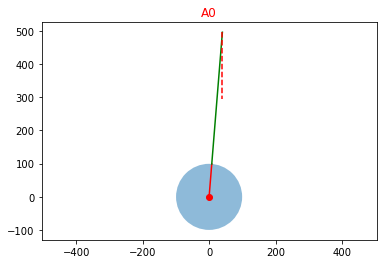

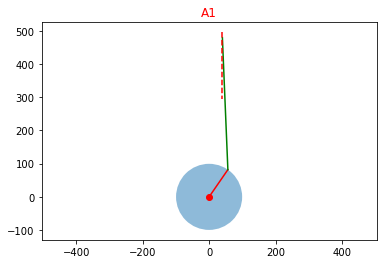

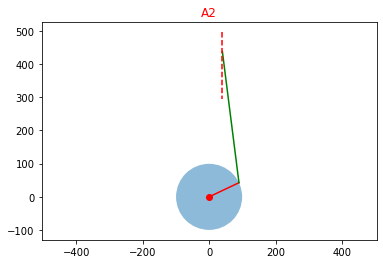

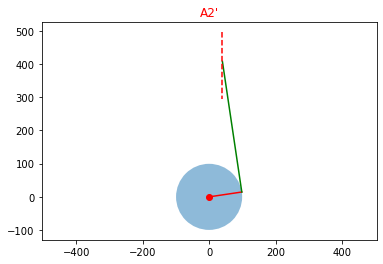

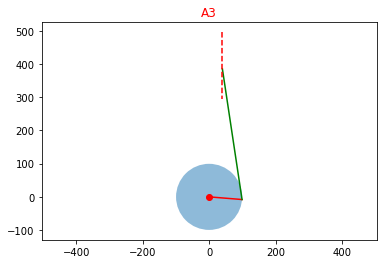

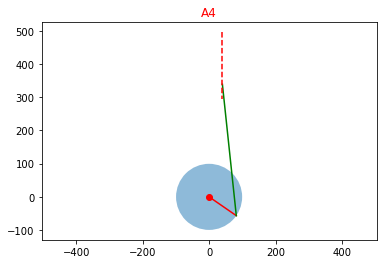

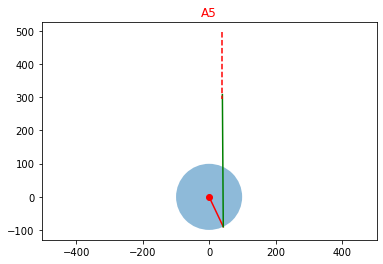

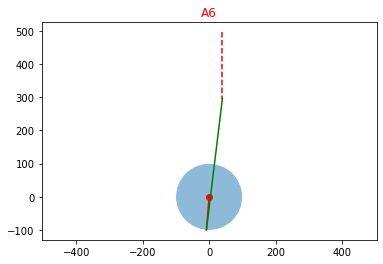

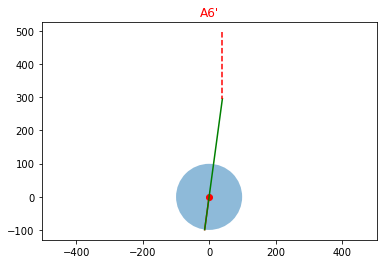

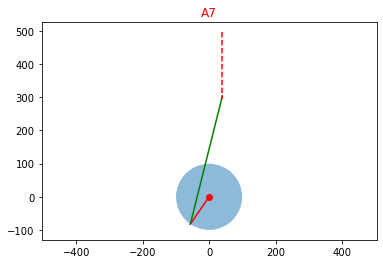

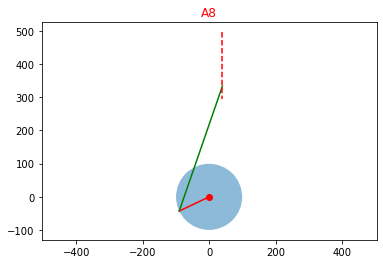

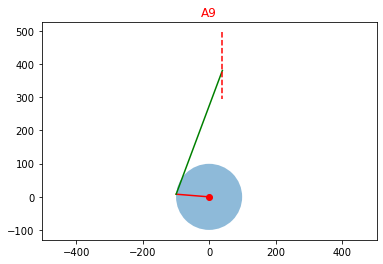

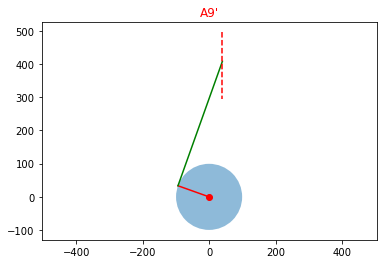

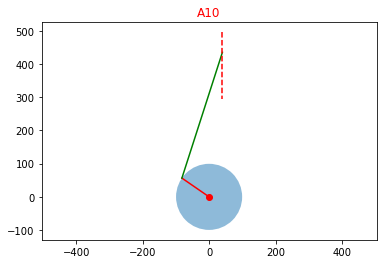

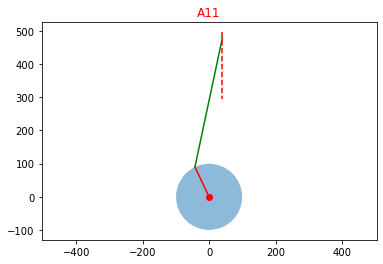

In [23]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt


class Crank_slider_shape:

    def __init__(self, coor):
        self.coor = coor

    def __draw_O(self, ax):
        x, y = 0, 0
        ax.plot(x, y, 'ro')

    def __draw_circles(self, ax):
        cir1 = Circle(xy=(0.0, 0.0), radius=self.coor.r, alpha=0.5)
        ax.add_patch(cir1)

    def __draw_crank(self, ax, A):
        ax.plot([0, A.x], [0, A.y], color="red")

    def __draw_link(self, ax, A, B):
        ax.plot([A.x, B.x], [A.y, B.y], color="green")

    def __draw_slider(self, ax):
        ax.plot([self.coor.B_up.x, self.coor.B_down.x],
                [self.coor.B_up.y, self.coor.B_down.y],
                color="red",
                linestyle="--")

    def __show(self, i, A, B):
        self.fig = plt.figure(i)
        ax = self.fig.add_subplot(111)
        ax.set_title(name_list[i - 1], fontsize=12, color='r')
        self.__draw_O(ax)
        self.__draw_circles(ax)
        self.__draw_crank(ax, A)
        self.__draw_link(ax, A, B)
        self.__draw_slider(ax)

    def show(self):
        for i, A, B in zip(range(1, 16), coor.A_list, coor.B_list):
            self.__show(i, A, B)
            plt.axis('scaled')
            #changes limits of x or y axis so that equal increments of x and y have the same length
            plt.axis('equal')
        plt.show()


mechanism_shape = Crank_slider_shape(coor)

mechanism_shape.show()

In [24]:
import sympy


class Vector_Equation:

    def __init__(self, PA, theta_AB, theta_PB):
        self.PA = PA
        self.theta_AB = theta_AB
        self.theta_PB = theta_PB
        self.x = 0.0
        self.y = 0.0

    def solve(self):

        # x,y 为 PB 与 AB 的交点
        x, y, t1, t2 = sympy.symbols('x, y, t1, t2')
        # AB 的参数方程 交于交点
        fun_AB_x = self.PA.x + t1 * math.cos(self.theta_AB) - x
        fun_AB_y = self.PA.y + t1 * math.sin(self.theta_AB) - y
        # 同理 PB
        fun_PB_x = t2 * math.cos(self.theta_PB) - x
        fun_PB_y = t2 * math.sin(self.theta_PB) - y
        result = sympy.solve([fun_AB_x, fun_AB_y, fun_PB_x, fun_PB_y],
                             [x, y, t1, t2])
        self.x = result[x]
        self.y = result[y]


In [25]:
import cmath


class Velocity_analysis:

    def __init__(self, coor, n, co_l_AC2):
        self.coor = coor
        self.omega = 2 * math.pi * n / 60
        self.va = self.omega * self.coor.r
        self.co_l_AC2 = co_l_AC2
        self.PA_list = []
        self.theta_AB_list = []
        self.theta_lab_list = []
        self.vb_list = []
        self.vc2_list = []
        self.omega_ab_list = []

    def __cal_params(self):
        for A, B, theta_OA in zip(self.coor.A_list, self.coor.B_list,
                                  self.coor.theta_list):
            theta_PA = theta_OA - math.pi / 2
            PA_x = self.va * math.cos(theta_PA)
            PA_y = self.va * math.sin(theta_PA)
            PA = geo.Point(PA_x, PA_y)
            self.PA_list.append(PA)
            # 加还是减 90 度 ， 无所谓
            complex_lab = complex((B.x - A.x), (B.y - A.y))
            (_, theta_lab) = cmath.polar(complex_lab)
            theta_AB = theta_lab + math.pi / 2
            self.theta_AB_list.append(theta_AB)
            self.theta_lab_list.append(theta_lab)

    def solve(self):
        self.__cal_params()
        for PA, theta_AB in zip(self.PA_list, self.theta_AB_list):
            res = Vector_Equation(PA, theta_AB, math.pi / 2)
            res.solve()
            vb = geo.Point(res.x, res.y)
            self.vb_list.append(vb)
            vab_x = vb.x - PA.x
            vab_y = vb.y - PA.y
            vc2_x = PA.x + self.co_l_AC2 * (vab_x)
            vc2_y = PA.y + self.co_l_AC2 * (vab_y)
            vc2 = geo.Point(vc2_x, vc2_y)
            self.vc2_list.append(vc2)
            # 计算 Omega 不需要计算正负
            vab = math.sqrt(vab_x**2 + vab_y**2)
            omega_ab = vab / self.coor.l
            self.omega_ab_list.append(omega_ab)


vel = Velocity_analysis(coor, n1, conefficient_l_AC2)
vel.solve()
display("Wa = {0}, Va = {1}".format(vel.omega, vel.va))
show_state_xy(vel.vb_list)

'Wa = 68.06784082777885, Va = 6769.896557178501'

'A0 : (1.7020051481301193e-28, 2.77958534544837e-12)'

'A1 : (-2.496630209012228e-13, -4077.3065519796855)'

'A2 : (-3.969810571342646e-13, -6483.192662744197)'

"A2' : (-4.190805220357207e-13, -6844.104313627417)"

'A3 : (-4.0817258739339245e-13, -6665.964222134543)'

'A4 : (-3.162212212221827e-13, -5164.284452339205)'

'A5 : (-1.7521867180208966e-13, -2861.5380683489084)'

'A6 : (-1.690071374058592e-14, -276.00960133734634)'

"A6' : (5.868689544234045e-29, 9.584297363648116e-13)"

'A7 : (1.501204378792212e-13, 2451.6528028120565)'

'A8 : (3.130986391352755e-13, 5113.288816877924)'

'A9 : (4.256580646623506e-13, 6951.523736618755)'

"A9' : (4.4016635711954196e-13, 7188.462133343306)"

'A10 : (4.1698708010727205e-13, 6809.915812421907)'

'A11 : (2.572930506809761e-13, 4201.914394584845)'

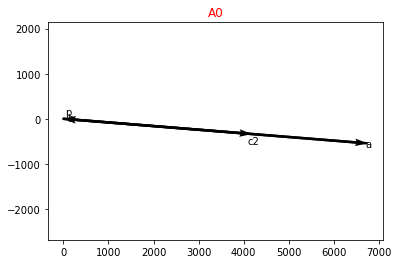

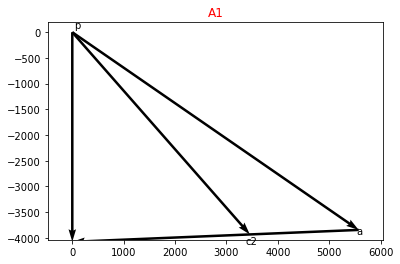

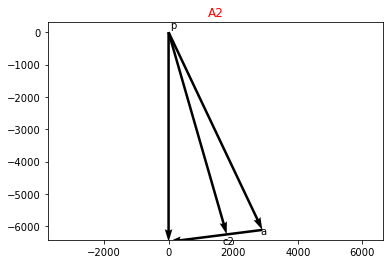

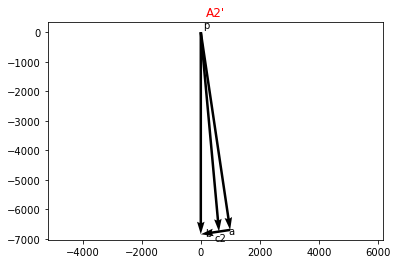

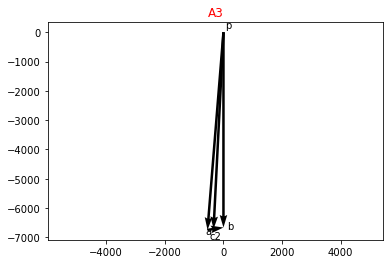

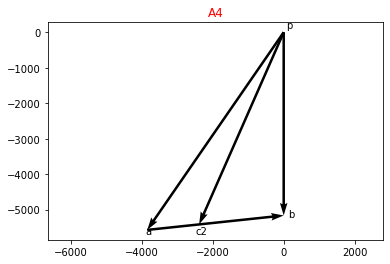

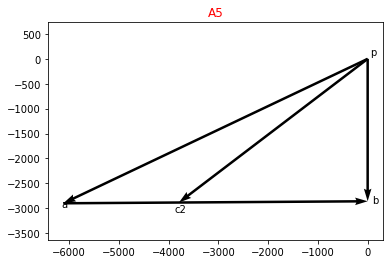

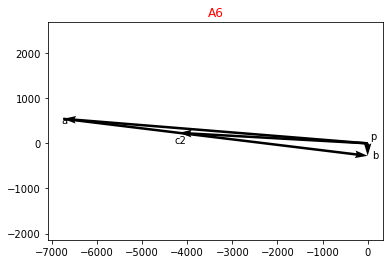

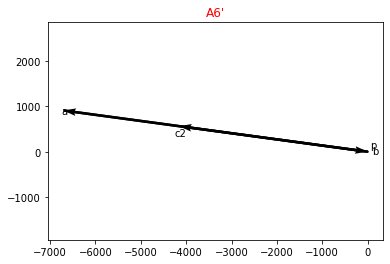

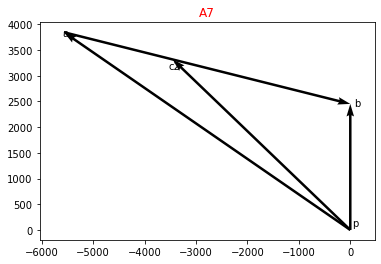

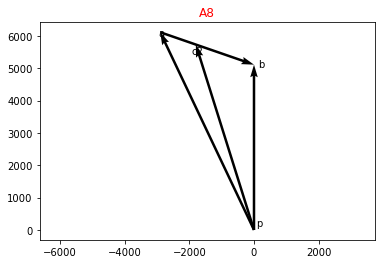

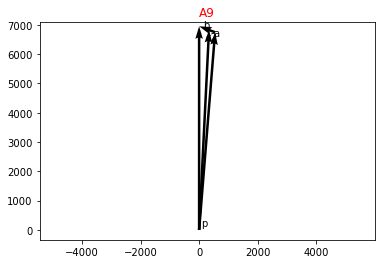

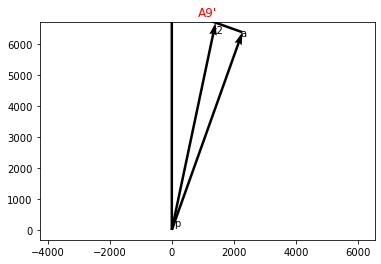

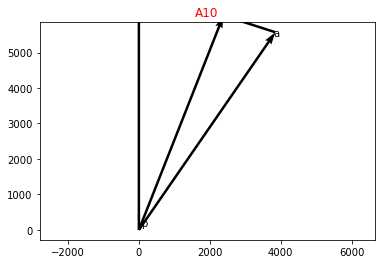

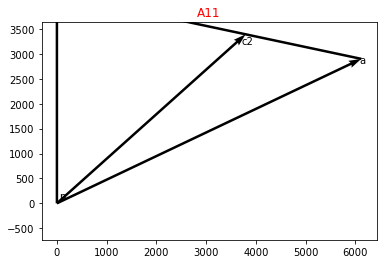

In [26]:
class Vel_shapes:

    def __init__(self, vel_list):
        self.vel_list = vel_list

    def __draw_vec(self, ax, A, B):
        x = A.x
        y = A.y
        u = B.x - A.x
        v = B.y - A.y
        ax.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1)

    def __show(self, i, P, A, B, C2):
        self.fig = plt.figure(i)
        ax = self.fig.add_subplot(111)
        ax.set_title(name_list[i - 1], fontsize=12, color='r')
        self.__draw_vec(ax, P, A)
        self.__draw_vec(ax, A, B)
        self.__draw_vec(ax, P, B)
        self.__draw_vec(ax, P, C2)
        plt.annotate("p",
                     xy=(P.x, P.y),
                     xytext=(2, 4),
                     textcoords='offset points')
        plt.annotate("a",
                     xy=(A.x, A.y),
                     xytext=(-2, -4),
                     textcoords='offset points')
        plt.annotate("b",
                     xy=(B.x, B.y),
                     xytext=(4, -2),
                     textcoords='offset points')
        plt.annotate("c2",
                     xy=(C2.x, C2.y),
                     xytext=(-4, -10),
                     textcoords='offset points')

    def show(self):
        for i, A, B, C2 in zip(range(1, 16), self.vel_list.PA_list,
                               self.vel_list.vb_list, self.vel_list.vc2_list):
            P = geo.Point(0, 0)
            self.__show(i, P, A, B, C2)
            plt.axis('scaled')
            #changes limits of x or y axis so that equal increments of x and y have the same length
            plt.axis('equal')
        plt.show()


vel_shape = Vel_shapes(vel)
vel_shape.show()

In [27]:
class Accelerator_analysis:

    def __init__(self, coor, vel):
        self.coor = coor
        self.vel = vel
        self.a_a_list = []
        self.a_ab_n_list = []
        self.theta_a_ab_t_list = self.vel.theta_AB_list
        self.a_b_list = []
        self.a_c2_list = []
        self.co_l_AC2 = self.vel.co_l_AC2
        self.a_d_list = []
        self.a_db_list = []

    def __cal_params(self):
        a_a_len = self.vel.omega**2 * self.coor.r
        for theta_loa, theta_lab, omega_ab in zip(self.coor.theta_list,
                                                  self.vel.theta_lab_list,
                                                  self.vel.omega_ab_list):
            a_a_x = -a_a_len * math.cos(theta_loa)
            a_a_y = -a_a_len * math.sin(theta_loa)
            a_a = geo.Point(a_a_x, a_a_y)
            self.a_a_list.append(a_a)

            a_ab_n_len = omega_ab**2 * self.coor.l
            a_ab_n_x = -a_ab_n_len * math.cos(theta_lab)
            a_ab_n_y = -a_ab_n_len * math.sin(theta_lab)
            a_ab_n = geo.Point(a_ab_n_x, a_ab_n_y)
            self.a_ab_n_list.append(a_ab_n)

    def solve(self):
        self.__cal_params()
        for a_a, a_ab_n, theta_a_ab_t in zip(self.a_a_list, self.a_ab_n_list,
                                             self.theta_a_ab_t_list):
            temp_pa = geo.Point(a_a.x + a_ab_n.x, a_a.y + a_ab_n.y)
            self.a_d_list.append(temp_pa)

            res = Vector_Equation(temp_pa, theta_a_ab_t, math.pi / 2)
            res.solve()
            a_b = geo.Point(res.x, res.y)
            self.a_b_list.append(a_b)

            a_db = geo.Point(a_b.x - temp_pa.x, a_b.y - temp_pa.y)
            self.a_db_list.append(a_db)

            a_ab_x = a_b.x - a_a.x
            a_ab_y = a_b.y - a_a.y
            a_ab = geo.Point(a_ab_x, a_ab_y)
            a_c2_x = a_a.x + self.co_l_AC2 * a_ab.x
            a_c2_y = a_a.y + self.co_l_AC2 * a_ab.y
            a_c2 = geo.Point(a_c2_x, a_c2_y)
            self.a_c2_list.append(a_c2)


acc = Accelerator_analysis(coor, vel)
acc.solve()
show_state_xy(acc.a_b_list)


'A0 : (-3.5391094016654647e-11, -577980.4273574272)'

'A1 : (-2.7349367402123652e-11, -446649.0652025601)'

'A2 : (-1.020160717876149e-11, -166604.88862362993)'

"A2' : (-1.5732205718212684e-13, -2569.2641713784005)"

'A3 : (6.45472005363032e-12, 105413.57815370674)'

'A4 : (1.617107627418756e-11, 264093.71723253565)'

'A5 : (1.9809987364880706e-11, 323521.64523964265)'

'A6 : (2.1231140363748e-11, 346730.8350216557)'

"A6' : (2.135007365872395e-11, 348673.16312897217)"

'A7 : (2.1995201928350602e-11, 359208.9073137578)'

'A8 : (1.9370059442843282e-11, 316337.0770466956)'

'A9 : (8.18199315635038e-12, 133622.08862256442)'

"A9' : (-9.555903878269605e-13, -15605.975347214873)"

'A10 : (-1.1193012013961522e-11, -182795.75828319683)'

'A11 : (-2.907909781957406e-11, -474897.70666644524)'

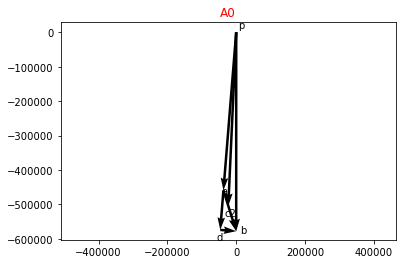

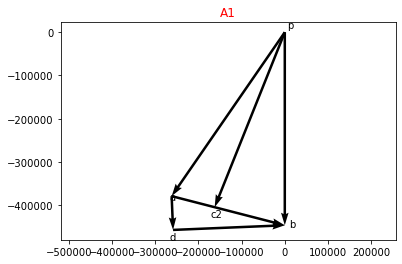

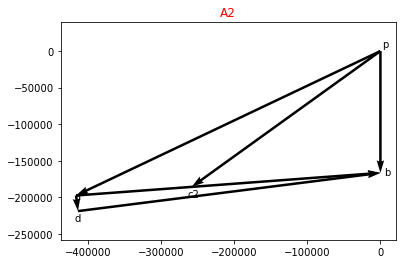

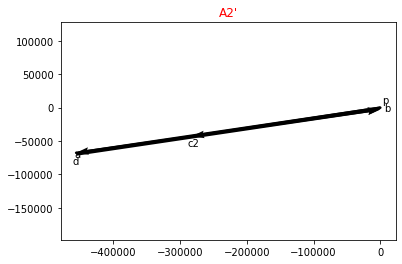

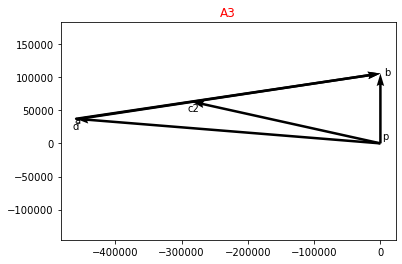

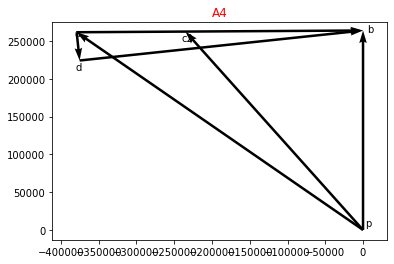

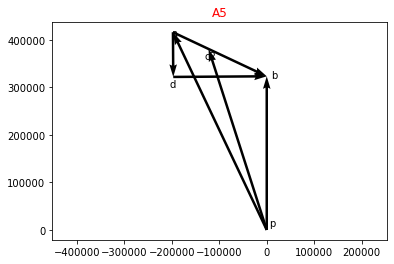

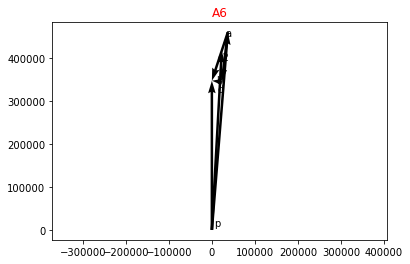

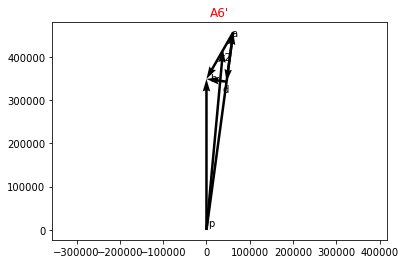

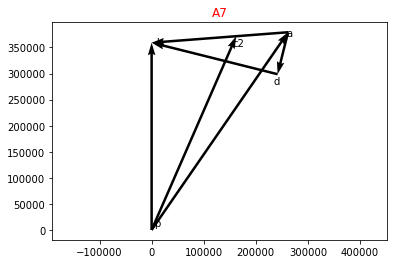

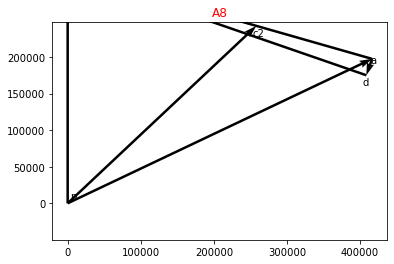

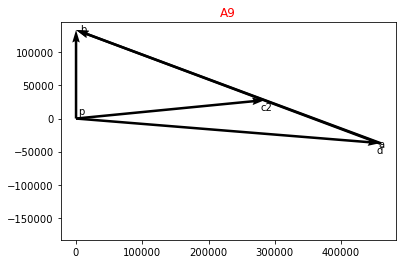

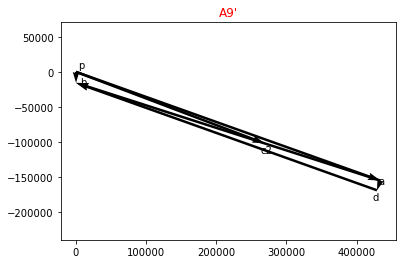

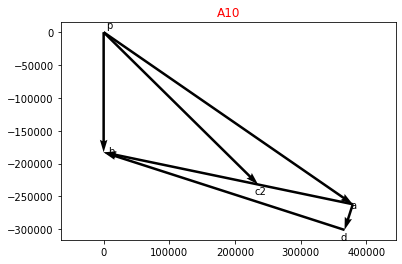

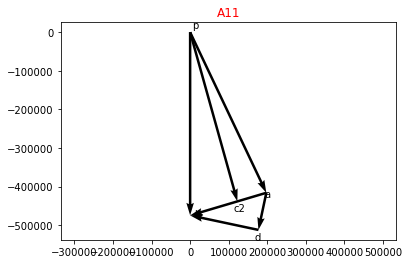

In [28]:
class Acc_shapes:

    def __init__(self, acc_list):
        self.acc_list = acc_list

    def __draw_acc(self, ax, A, B):
        x = A.x
        y = A.y
        u = B.x - A.x
        v = B.y - A.y
        ax.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1)

    def __show(self, i, P, A, B, C2, D):
        self.fig = plt.figure(i)
        ax = self.fig.add_subplot(111)
        ax.set_title(name_list[i - 1], fontsize=12, color='r')
        self.__draw_acc(ax, P, A)
        self.__draw_acc(ax, A, B)
        self.__draw_acc(ax, P, B)
        self.__draw_acc(ax, P, C2)
        self.__draw_acc(ax, A, D)
        self.__draw_acc(ax, D, B)
        plt.annotate("p",
                     xy=(P.x, P.y),
                     xytext=(2, 4),
                     textcoords='offset points')
        plt.annotate("a",
                     xy=(A.x, A.y),
                     xytext=(-2, -4),
                     textcoords='offset points')
        plt.annotate("b",
                     xy=(B.x, B.y),
                     xytext=(4, -2),
                     textcoords='offset points')
        plt.annotate("c2",
                     xy=(C2.x, C2.y),
                     xytext=(-4, -10),
                     textcoords='offset points')
        plt.annotate("d",
                     xy=(D.x, D.y),
                     xytext=(-4, -10),
                     textcoords='offset points')

    def show(self):
        for i, A, B, C2, D in zip(range(1, 16), self.acc_list.a_a_list,
                                  self.acc_list.a_b_list,
                                  self.acc_list.a_c2_list,
                                  self.acc_list.a_d_list):
            P = geo.Point(0, 0)
            self.__show(i, P, A, B, C2, D)
            plt.axis('scaled')
            #changes limits of x or y axis so that equal increments of x and y have the same length
            plt.axis('equal')
        plt.show()


acc_shape = Acc_shapes(acc)
acc_shape.show()


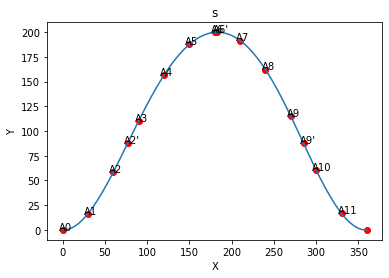

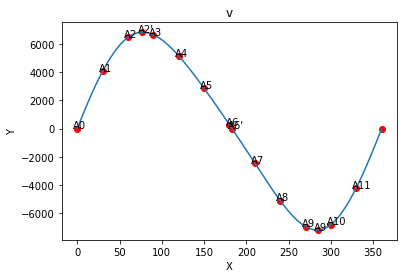

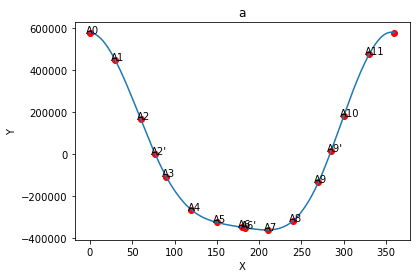

In [29]:
from scipy.interpolate import make_interp_spline


def draw_smooth_cur(x, y, title):
    x_max = max(x)
    x_min = min(x)
    model = make_interp_spline(x, y)
    # plt.plot(x,
    #          y,
    #          color='red',
    #          #alpha=0.3,
    #          #linestyle='--',
    #          #linewidth=5,
    #          marker='x',
    #          markeredgecolor='r',
    #          markersize='5',
    #          markeredgewidth=10)
    plt.scatter(x, y, c='red')

    for key_x, key_y, name in zip(x, y, name_list):
        plt.annotate(name,
                     xy=(key_x, key_y),
                     xytext=(-4, 0),
                     textcoords='offset points')

    xs = np.linspace(x_min, x_max, 500)
    ys = model(xs)

    plt.plot(xs, ys)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


x = np.array(angle_list.copy())
x = x[0] - x
x = np.append(x, [360])

s = np.array([Bx.y for Bx in coor.B_list])
s = coor.B_up.y - s
s = np.append(s, [s[0]])

draw_smooth_cur(x, s, "s")

v = np.array([vb.y for vb in vel.vb_list])
v = -v
v = np.append(v, [v[0]])

draw_smooth_cur(x, v, "v")

a = np.array([ab.y for ab in acc.a_b_list])
a = -a
a = np.append(a, [a[0]])

draw_smooth_cur(x, a, "a")


In [45]:
# 取向上为正

# 首先考虑活塞
area = math.pi / 4 * (D / 10)**2
Fpi = pi * area
m3 = Q3 / g
a3 = np.array([ab.y for ab in acc.a_b_list])
a3 = a3 / 1000
a3 = np.append(a3, a3)
# 使用动静法 F - m *a
Pi3 = - m3 * a3
P = Fpi - Q3 + Pi3

for ele_pi3 in P:
    display(ele_pi3)

display(Fpi)

10791.628119791116

8805.270248730189

3484.430893730515

367.7540291377361

-1683.9199750388816

-4698.842617536631

-5827.973249671663

-6268.947855529912

-6305.852089568925

-6506.031229079853

-6963.8114787095365

-5273.509733236457

-3964.9905474552893

-4350.950740842458

-13305.747003184812

-60459.69326362539

-62954.989144567866

-33922.51283256315

-25842.553479761908

-18733.34330607069

-12841.850775641375

-10153.946333664808

-8050.230890115325

-8087.135124154338

-7523.907248842946

-6709.342473768763

-3237.7576937102704

-402.4244782844639

2774.1813974991933

8324.118416780912

array([     0.        ,    508.93800988,    508.93800988,    508.93800988,
          508.93800988,    508.93800988,    508.93800988,    508.93800988,
          508.93800988,    508.93800988,   -763.40701482,  -2544.69004941,
        -4071.50407905,  -7634.07014822, -22138.80342985, -71251.32138342,
       -71251.32138342, -36898.00571641, -25701.36949902, -16540.48532115,
        -7634.07014822,  -3817.03507411,  -1272.3450247 ,  -1272.3450247 ,
         -508.93800988,   -508.93800988,   -508.93800988,   -508.93800988,
         -508.93800988,   -508.93800988])

In [43]:
# 分析连杆

# 分析 v = w X l
# 带入二维
# vx = - w * y
# vy = w * x
# 理解其中的含义， w 的正负代表逆时针旋转和顺时针旋转

alpha_list = []
l_bc2_list = []
l_ba_x_list = []
l_ba_y_list = []
for A, B, a_db in zip(coor.A_list, coor.B_list, acc.a_db_list):
    ab_x = B.x - A.x
    alpha = a_db.y / ab_x
    alpha_list.append(alpha)

    l_ba_x_list.append(A.x - B.x)
    l_ba_y_list.append(A.y - B.y)

    l_bc2_x = (A.x - B.x) * (1 - conefficient_l_AC2)
    l_bc2_y = (A.y - B.y) * (1 - conefficient_l_AC2)


    l_bc2 = geo.Point(l_bc2_x, l_bc2_y)
    l_bc2_list.append(l_bc2)

arr_alpha = np.array(alpha_list)
m2 = Q2 / g
Rho_square = conefficient_Rho_square * (coor.l / 1000)**2
J2 = m2 * Rho_square
# 动静法得到 负号
Mi2 = -J2 * arr_alpha

Mpi2_list = []
Mq2_list = []

for l_bc2, ac2 in zip(l_bc2_list, acc.a_c2_list):
    ele_q2 = np.array([0, -Q2, 0])
    ele_l_bc2 = np.array([l_bc2.x/1000, l_bc2.y/1000, 0])
    ele_ac2 = np.array([ac2.x/1000, ac2.y/1000])

    ele_Mq2 = np.cross(ele_l_bc2, ele_q2)
    Mq2_list.append(ele_Mq2[2])

    # 注意动静法
    ele_Mpi2 = m2 * np.cross(ele_l_bc2, -ele_ac2)
    Mpi2_list.append(ele_Mpi2[2])

Mpi2 = np.array(Mpi2_list)
Mq2 = np.array(Mq2_list)

Mr12_t = 0 - Mi2 - Mpi2 - Mq2

# M = r X F
# 首先旋转到力的方向
ba_x = np.array(l_ba_x_list) /1000
ba_y = np.array(l_ba_y_list) /1000
R12_t_x = -Mr12_t * ba_y
R12_t_y = Mr12_t * ba_x
# 再确定大小， 此时为 M*r
R12_t_x = R12_t_x / ((coor.l/1000)**2)
R12_t_y = R12_t_y / ((coor.l/1000)**2)

R12_t_len = (R12_t_x**2 + R12_t_y**2)**0.5

display("J2 = {}".format(J2))
show_state(Mi2)
display("Mpi2")
show_state(Mpi2)
display("Mq2")
show_state(Mq2)
display("R12_t")
show_state(R12_t_len)

'J2 = 0.3089360336540162'

'A0 : 36.15280687528271'

'A1 : 201.09264896015893'

'A2 : 324.00933646787047'

"A2' : 357.8293166781552"

'A3 : 360.88789581913153'

'A4 : 293.2765864122214'

'A5 : 153.03664079500746'

'A6 : -18.04675819752079'

"A6' : -36.36445802463132"

'A7 : -193.5789107259719'

'A8 : -335.9584584687284'

'A9 : -380.81697449066763'

"A9' : -354.04441842803743"

'A10 : -299.35281006896935'

'A11 : -140.7020049314071'

'Mpi2'

'A0 : -50.10353705774014'

'A1 : 507.2527484024027'

'A2 : 791.8662079915192'

"A2' : 810.1846804376405"

'A3 : 771.5851162830525'

'A4 : 584.3446461433339'

'A5 : 339.964276883375'

'A6 : 77.87061452212646'

"A6' : 50.39686065060515"

'A7 : -190.5635800059512'

'A8 : -466.77268029592085'

'A9 : -728.5365324852555'

"A9' : -815.4301041301557"

'A10 : -835.7024197147898'

'A11 : -597.9564595180483'

'Mq2'

'A0 : 2.281243569313887'

'A1 : -1.1764668564032195'

'A2 : -3.5547528412115397'

"A2' : -4.162472237165245"

'A3 : -4.216354576111428'

'A4 : -2.983996410525429'

'A5 : -0.18788771970821064'

'A6 : 3.4227564306861122'

"A6' : 3.803657164533071"

'A7 : 6.88046685640322'

'A8 : 9.258752841211535'

'A9 : 9.920354576111427'

"A9' : 9.53044927130113"

'A10 : 8.687996410525432'

'A11 : 5.891887719708212'

'R12_t'

'A0 : 29.35559232194875'

'A1 : 1778.943968563763'

'A2 : 2798.13815058437'

"A2' : 2927.768120418786"

'A3 : 2838.226185165299'

'A4 : 2200.224824368088'

'A5 : 1239.713354837472'

'A6 : 159.1022674208599'

"A6' : 44.86813492294483"

'A7 : 949.0349094680284'

'A8 : 1996.0476970475531'

'A9 : 2765.718191126975'

"A9' : 2917.9385915159774"

'A10 : 2833.473177000269'

'A11 : 1843.337038443529'

In [39]:
P_plus_Q2 = P - Q2
F_P_plus_Q2_list = []

for F_P_plus_Q2 in P_plus_Q2:
    ele_x = 0
    ele_y = F_P_plus_Q2
    ele = geo.Point(ele_x, ele_y)
    F_P_plus_Q2_list.append(ele)

F_pi2_list = []
for ac2 in acc.a_c2_list:
    pi2 = geo.Point(-m2 * ac2.x / 1000, -m2 * ac2.y / 1000)
    F_pi2_list.append(pi2)


def double_list(list_before):
    return [val for i in range(2) for val in list_before]


F_pi2_list = double_list(F_pi2_list)

F_R12_t_list = []

for ele_x, ele_y in zip(R12_t_x, R12_t_y):
    ele = geo.Point(ele_x, ele_y)
    F_R12_t_list.append(ele)

F_R12_t_list = double_list(F_R12_t_list)

theta_R12_n_list = vel.theta_lab_list.copy()
theta_R12_n_list = double_list(theta_R12_n_list)

R03_list = []

for P_plus_Q2, Pi2, R12_t, theta_R12_n in zip(F_P_plus_Q2_list, F_pi2_list,
                                              F_R12_t_list, theta_R12_n_list):
    pa = geo.Point(P_plus_Q2.x + Pi2.x + R12_t.x,
                   P_plus_Q2.y + Pi2.y + R12_t.y)
    res = Vector_Equation(pa, theta_R12_n, math.pi)
    res.solve()
    R03 = geo.Point(res.x, res.y)
    R03_list.append(R03)

for Pi2 in F_pi2_list:
    len_Pi2 = (Pi2.x ** 2 + Pi2.y**2)**0.5
    display(len_Pi2)


5806.731058563953

5016.004917837574

3657.330759477495

3287.258928806643

3354.243874017298

4054.0358712149596

4602.965062863349

4797.439579400222

4799.867628849499

4663.498869975744

4074.3323353319165

3290.4785445434304

3309.1462794733566

3796.7322543220675

5236.662768239751

5806.731058563953

5016.004917837574

3657.330759477495

3287.258928806643

3354.243874017298

4054.0358712149596

4602.965062863349

4797.439579400222

4799.867628849499

4663.498869975744

4074.3323353319165

3290.4785445434304

3309.1462794733566

3796.7322543220675

5236.662768239751

C:\Users\Hasee\AppData\Local\Temp/ipykernel_23520/3844775688.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(i)


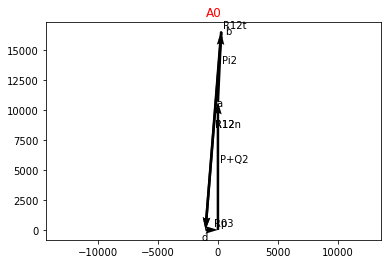

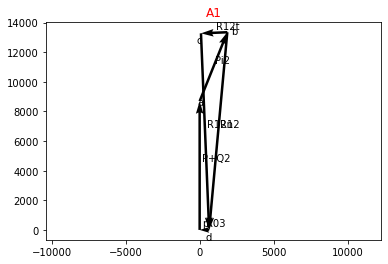

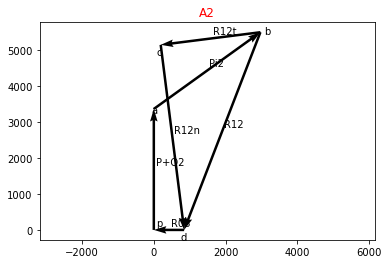

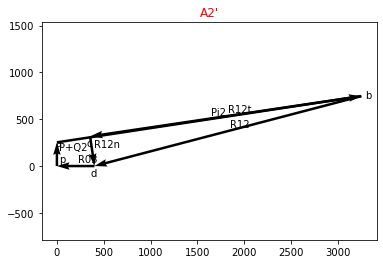

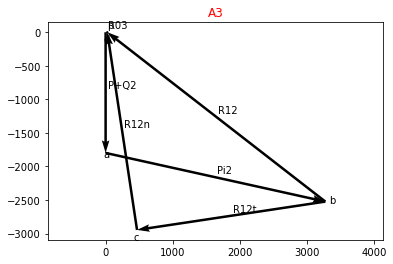

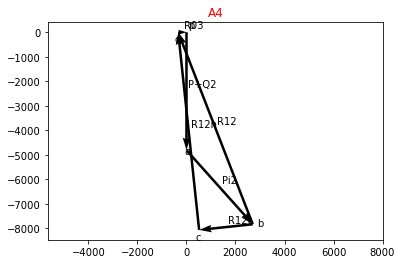

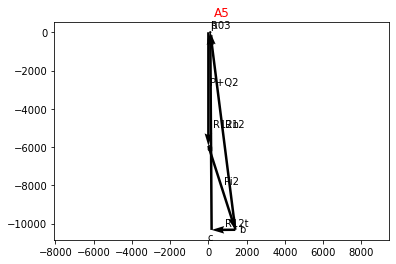

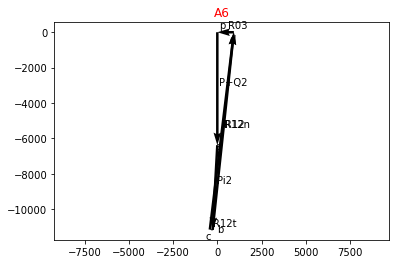

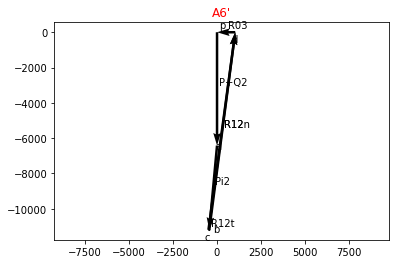

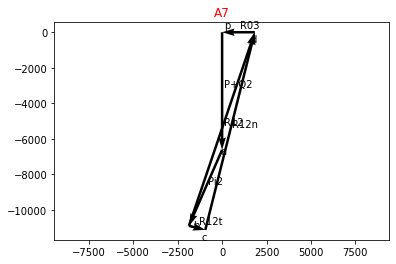

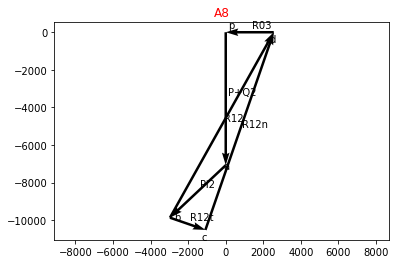

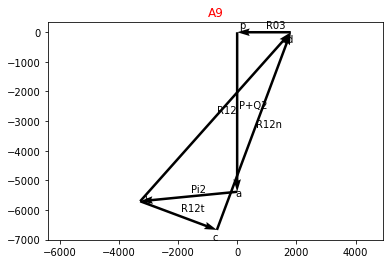

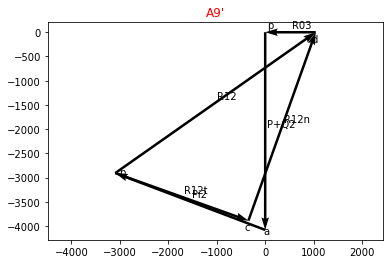

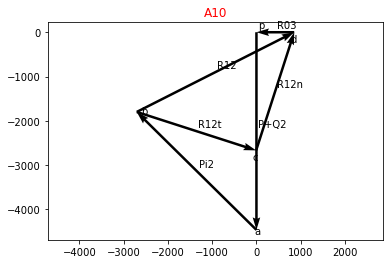

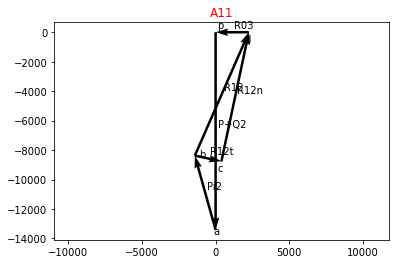

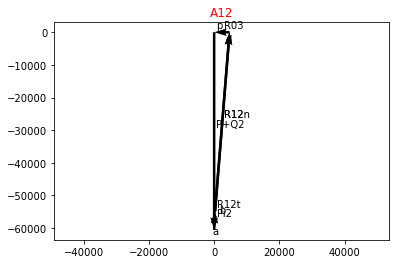

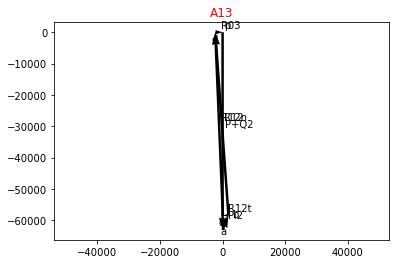

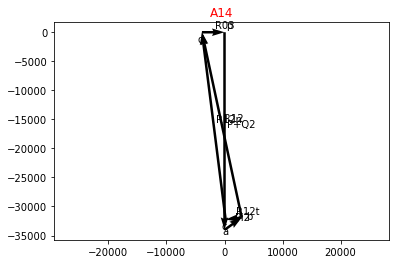

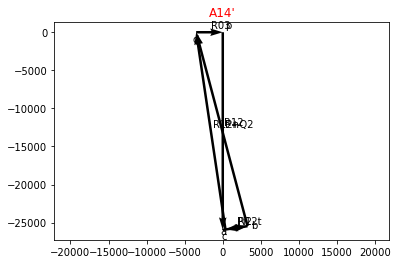

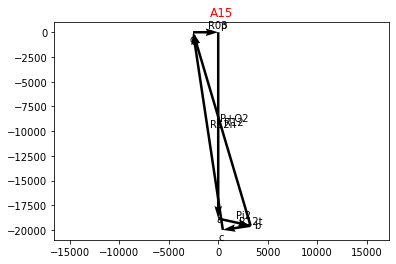

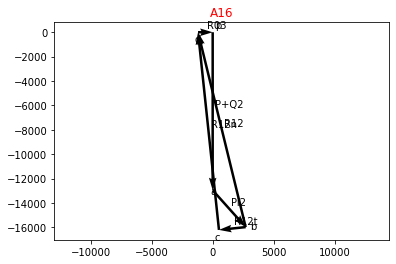

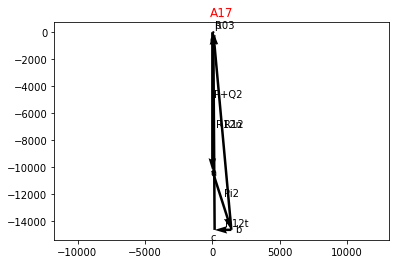

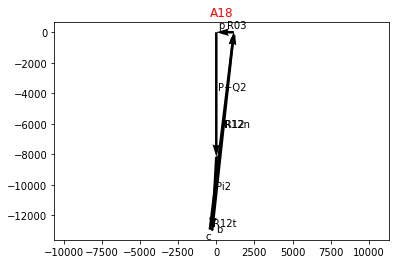

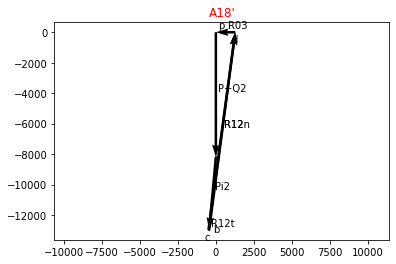

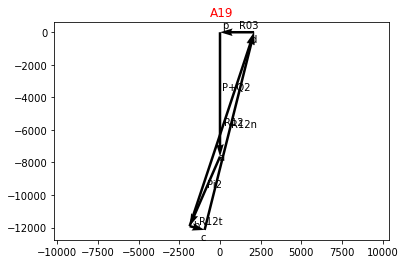

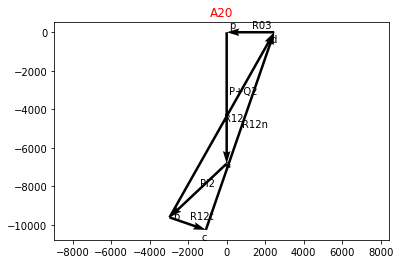

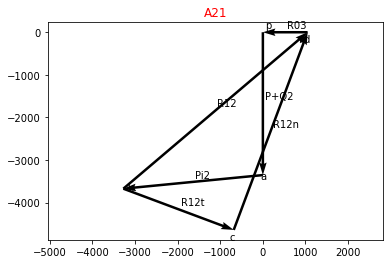

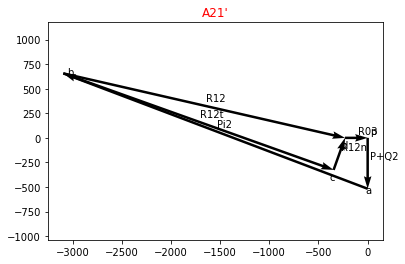

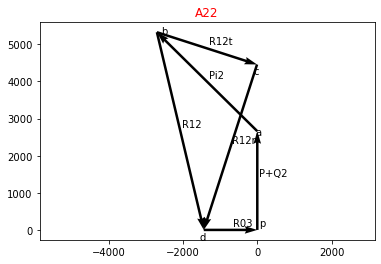

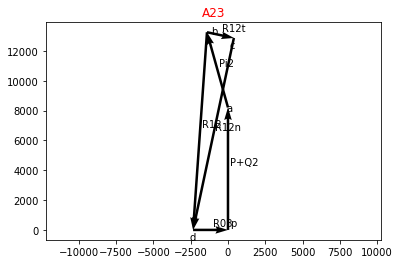

'R03'

1036.61821134574

640.4469316451142

844.0275567484358

400.93848978693006

25.071566995389865

337.98915459181376

100.26261695658742

934.6194406184549

1030.6096533476273

1838.1108644928333

2554.713837462965

1810.2785856118335

1041.9867276479672

852.6798055556302

2256.3289776287534

4716.79291660033

2340.7297025254848

3884.805627178545

3490.477161576487

2539.741607532253

1200.0799891835811

71.58511494890215

1151.3142461266755

1271.8390462488853

2092.8240027433426

2466.7628632756077

1049.6383474393251

229.99193356415492

1441.820917761873

2340.412404783569

In [51]:
F_name_list = [
    'A0', 'A1', 'A2', "A2'", 'A3', 'A4', 'A5', 'A6', "A6'", 'A7', 'A8', 'A9',
    "A9'", 'A10', 'A11', 'A12', 'A13', 'A14', "A14'", 'A15', 'A16', 'A17',
    'A18', "A18'", 'A19', 'A20', 'A21', "A21'", 'A22', 'A23'
]


class F_shapes:

    def __init__(self, F_P_plus_Q2_list, F_pi2_list, F_R12_t_list, R03_list):
        self.F_P_plus_Q2_list = F_P_plus_Q2_list
        self.F_pi2_list = F_pi2_list
        self.F_R12_t_list = F_R12_t_list
        self.R03_list = R03_list
        self.pb_list =[]
        self.pc_list =[]

    def __draw(self, ax, A, B, title):
        x = A.x
        y = A.y
        u = B.x - A.x
        v = B.y - A.y
        ax.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1)
        plt.annotate(title,
                     xy=((A.x + B.x) / 2, (A.y + B.y) / 2),
                     xytext=(2, 4),
                     textcoords='offset points')

    def __show(self, i, P, A, B, C, D):
        self.fig = plt.figure(i)
        ax = self.fig.add_subplot(111)
        ax.set_title(F_name_list[i - 1], fontsize=12, color='r')
        self.__draw(ax, P, A, "P+Q2")
        self.__draw(ax, A, B, "Pi2")
        self.__draw(ax, B, C, "R12t")
        self.__draw(ax, C, D, "R12n")
        self.__draw(ax, D, P, "R03")
        self.__draw(ax, B, D, "R12")
        plt.annotate("p",
                     xy=(P.x, P.y),
                     xytext=(2, 4),
                     textcoords='offset points')
        plt.annotate("a",
                     xy=(A.x, A.y),
                     xytext=(-2, -4),
                     textcoords='offset points')
        plt.annotate("b",
                     xy=(B.x, B.y),
                     xytext=(4, -2),
                     textcoords='offset points')
        plt.annotate("c",
                     xy=(C.x, C.y),
                     xytext=(-4, -10),
                     textcoords='offset points')
        plt.annotate("d",
                     xy=(D.x, D.y),
                     xytext=(-4, -10),
                     textcoords='offset points')

    def show(self):
        for i, A, B, C, D in zip(range(1, 31), self.F_P_plus_Q2_list,
                                 self.F_pi2_list, self.F_R12_t_list,
                                 self.R03_list):
            P = geo.Point(0, 0)
            pb = geo.Point(A.x + B.x, A.y + B.y)
            self.pb_list.append(pb)
            pc = geo.Point(A.x + B.x + C.x, A.y + B.y + C.y)
            self.pc_list.append(pc)
            self.__show(i, P, A, pb, pc, D)
            plt.axis('scaled')
            #changes limits of x or y axis so that equal increments of x and y have the same length
            plt.axis('equal')
        plt.show()



f_shape = F_shapes(F_P_plus_Q2_list, F_pi2_list, F_R12_t_list, R03_list)
f_shape.show()

def len_ab(A, B):
    return ((B.x-A.x)**2 + (B.y - A.y)**2)**0.5

display("R03")
for pb, pc, pd in zip(f_shape.pb_list, f_shape.pc_list, f_shape.R03_list):
    zero_point = geo.Point(0,0)
    r12_n_len = len_ab(zero_point, pd)
    display(r12_n_len)

In [34]:
F12_list = []

for pb, pd in zip(f_shape.pb_list, R03_list):
    F12 = geo.Point(pd.x - pb.x, pd.y - pb.y)
    F12_list.append(F12)

Md_list = []

for oa, f12 in zip(double_list(coor.A_list), F12_list):
    vec_oa = np.array([oa.x/1000, oa.y/1000, 0])
    #反作用力
    vec_f21 = np.array([-f12.x, -f12.y,0])
    # 阻力与动力相反
    md = - np.cross(vec_oa, vec_f21)
    Md_list.append(md[2])

display(Md_list)

for i in range(0,30):
    display("{0}:{1}".format(F_name_list[i], Md_list[i]))




[-2.9196507627900132,
 -653.7040749008954,
 -404.17085522915426,
 -31.826678509580162,
 224.20481610669654,
 469.3864315242223,
 322.6660703822883,
 29.42109841764949,
 -4.462498419928437,
 -312.32894530869874,
 -651.3717080391872,
 -606.571380832259,
 -410.6191048276361,
 -348.33617080141835,
 -686.4602812696323,
 -2.9196507627913775,
 3644.7806755754145,
 3158.6926079383134,
 2603.574657887045,
 1893.8750238078114,
 1087.1937530840632,
 504.5278205415089,
 36.64405736956971,
 -4.462498419928636,
 -348.9905841445978,
 -632.255874462244,
 -398.66734784784575,
 -34.38605594096001,
 364.5048628557912,
 648.7788236557523]

'A0:-2.9196507627900132'

'A1:-653.7040749008954'

'A2:-404.17085522915426'

"A2':-31.826678509580162"

'A3:224.20481610669654'

'A4:469.3864315242223'

'A5:322.6660703822883'

'A6:29.42109841764949'

"A6':-4.462498419928437"

'A7:-312.32894530869874'

'A8:-651.3717080391872'

'A9:-606.571380832259'

"A9':-410.6191048276361"

'A10:-348.33617080141835'

'A11:-686.4602812696323'

'A12:-2.9196507627913775'

'A13:3644.7806755754145'

'A14:3158.6926079383134'

"A14':2603.574657887045"

'A15:1893.8750238078114'

'A16:1087.1937530840632'

'A17:504.5278205415089'

'A18:36.64405736956971'

"A18':-4.462498419928636"

'A19:-348.9905841445978'

'A20:-632.255874462244'

'A21:-398.66734784784575'

"A21':-34.38605594096001"

'A22:364.5048628557912'

'A23:648.7788236557523'

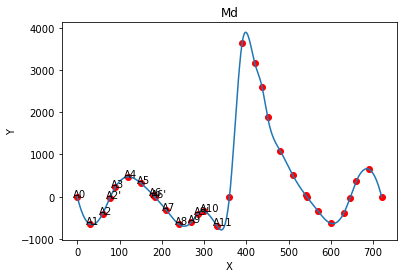

In [35]:
x = np.array(angle_list.copy())
x = x[0] - x
temp_x = x + 360
x = np.append(x, temp_x)
x = np.append(x, [720])


md_draw = np.array(Md_list)
md_draw = np.append(md_draw, md_draw[0])

draw_smooth_cur(x, md_draw, "Md")


In [36]:
from scipy import integrate
x = x / 360 * math.pi *2
area_md = integrate.trapz(md_draw, x)
display(area_md)

3900.0361637490396

In [37]:
import math
import numpy as np

Q2 = 115
Q3 = 190
# 取向上为正
Pa = np.array([1, -15, -15, -1, -2.5])
ul = 2
Pa = ul * Pa
d = 180
A = math.pi / 4 * ((d / 10)**2)
Pn = A * Pa

g = 10
m3 = Q3 / g
a3 = np.array([270, -170, 270, -170, 420])
a3 = -a3

Pi3 = m3 * a3
Ptot = -Q3 + Pi3 + Pn

print(Pn)
print(Pi3)
print(Ptot)

ac2 = np.array([320, 330, 320, 330, 450])
di2 = np.array([36, -54, 36, -54, 8])
ul_2 = 4
di2 = ul_2 * di2 / 1000
dq2 = np.array([-5, 19, -5, 19, 12])
dq2 = dq2 * ul_2 / 1000
m2 = Q2 / g
len_AB = 0.39448
rou_AB_square = 0.17 * len_AB**2
J2 = m2 * rou_AB_square
tao = np.array([380, -370, 380, -370, -40])
alpha = tao / len_AB

Mi2 = J2 * alpha
Pi2 = m2 * ac2
Mpi2 = Pi2 * di2
Mq2 = Q2 * dq2

Rt = (0 - Mi2 - Mpi2 - Mq2) / len_AB
print(Pi2)
print(J2)
print(Mi2)
print(Mpi2)
print(Mq2)
print(Rt)

R21 = np.array([167, 82, 330, 190, 296])
ua = np.array([50, 50, 50, 25, 50])
R21 = ua * R21
dal = np.array([55.2, -90.4, 63.8, 61.5, -3.8])
Md = R21 * dal
print(Md)


[  508.93800988 -7634.07014822 -7634.07014822  -508.93800988
 -1272.3450247 ]
[-5130.  3230. -5130.  3230. -7980.]
[ -4811.06199012  -4594.07014822 -12954.07014822   2531.06199012
  -9442.3450247 ]
[3680. 3795. 3680. 3795. 5175.]
0.30422628963200005
[ 293.059192 -285.347108  293.059192 -285.347108  -30.848336]
[ 529.92 -819.72  529.92 -819.72  165.6 ]
[-2.3   8.74 -2.3   8.74  5.52]
[-2080.40760495  2779.17032042 -2080.40760495  2779.17032042
  -355.58625025]
[ 460920. -370640. 1052700.  292125.  -56240.]


In [8]:
aaa = [-1084.2,	52,	-2511.6,	4742.4,	-1333.8,	150.8,	-15.6]

sum = [0]

for aa in aaa:
    ele  = sum[-1]
    ele += aa
    sum.append(ele)
sum

[0,
 -1084.2,
 -1032.2,
 -3543.8,
 1198.5999999999995,
 -135.2000000000005,
 15.599999999999511,
 -4.884981308350689e-13]